## Get model from the cloud

In [2]:
from zumicloud.zumimlcloudutils import download_model_from_cloud

model_zip_name = 'trafficsigns.zip' ## The name of your model goes here

#downloaded = download_model_from_cloud(model_zip_name)

## Load Model

In [3]:
from tensorflow.keras.models import load_model, model_from_json
from datetime import datetime

model_name = model_zip_name.split('.')[0]

start = datetime.now()
#model = load_model('trafficsignmodel.h5')
json_file = open(model_name + '.json','r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights(model_name + 'weights.h5')
stop = datetime.now()#,custom_objects={
print('model loaded in:')
print(stop-start)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.4 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 432, got 412
  return f(*args, **kwds)


model loaded in:
0:00:37.398566


## Use with Zumi

In [4]:
from zumi.util.camera import Camera
#from zumi.util.screen import Screen
from skimage import transform
from skimage import exposure
import IPython.display
import numpy as np
from PIL import Image
import time

camera = Camera()

Starting PiCamera
3...
2...
1...


/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


['Ahead', 'Left', 'Novehicles', 'Right', 'Stop', 'Signals']
[[2.1201042e-05 2.7383214e-03 5.2042967e-03 3.5376003e-04 9.3201989e-01
  5.9662484e-02]]


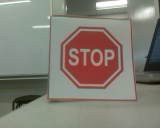

Stop
Closing PiCamera


In [5]:
camera.start_camera()
print("3...")
time.sleep(1)
print("2...")
time.sleep(1)
print("1...")
time.sleep(1)

frame = camera.capture()
#image = Image.fromarray(frame)
image = transform.resize(frame, (32, 32))
image = exposure.equalize_adapthist(image, clip_limit=0.1)

	# preprocess the image by scaling it to the range [0, 1]
image = image.astype("float32") / 255.0
image = np.expand_dims(image, axis=0)

# Get label names from training notebook
labelNames = ['Ahead', 'Left', 'Novehicles', 'Right', 'Stop', 'Signals']

start = datetime.now()
preds = model.predict(image)
print(labelNames)
print(preds)
stop = datetime.now()
j = preds.argmax(axis=1)[0]
label = labelNames[j]
IPython.display.display(Image.fromarray(frame))
#IPython.display.clear_output(wait=True) 
print(label)
camera.close()

In [6]:
camera.close()

Closing PiCamera
